In [81]:
import numpy as np
import pandas as pd

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
import matplotlib.pyplot as plt

In [82]:
dataset = pd.read_csv('dataset/final_data.csv')

In [83]:
dataset = pd.get_dummies(dataset, columns=['label'])

In [85]:
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset

In [88]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T

In [ ]:
#конвертировать в tensor (количество образцов, количество признаков):(1, 3) -> (1, (r,g,b))

In [111]:
train_dataset_tf=tf.convert_to_tensor(train_dataset)
train_labels_tf=tf.convert_to_tensor(train_labels)
test_dataset_tf=tf.convert_to_tensor(test_dataset)
test_labels_tf=tf.convert_to_tensor(test_labels)

In [97]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(11, activation = "softmax"),
])

In [98]:
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [124]:
history = model.fit(x=train_dataset_tf, y=train_labels_tf,
                    epochs=100,
                    batch_size=2048,
                    validation_data=(test_dataset_tf, test_labels_tf))

Epoch 1/100
2/2 [==============================] - 0s 84ms/step - loss: 0.2325 - accuracy: 0.9008 - val_loss: 0.4263 - val_accuracy: 0.8604
Epoch 2/100
2/2 [==============================] - 0s 46ms/step - loss: 0.2455 - accuracy: 0.8902 - val_loss: 0.4439 - val_accuracy: 0.8535
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 0.2506 - accuracy: 0.8872 - val_loss: 0.4220 - val_accuracy: 0.8604
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 0.2293 - accuracy: 0.9000 - val_loss: 0.4144 - val_accuracy: 0.8713
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.2253 - accuracy: 0.9020 - val_loss: 0.4178 - val_accuracy: 0.8693
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 0.2232 - accuracy: 0.9035 - val_loss: 0.4278 - val_accuracy: 0.8614
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 0.2229 - accuracy: 0.9048 - val_loss: 0.4065 - val_accuracy: 0.8772
Epoch 8/100
2/2 [===

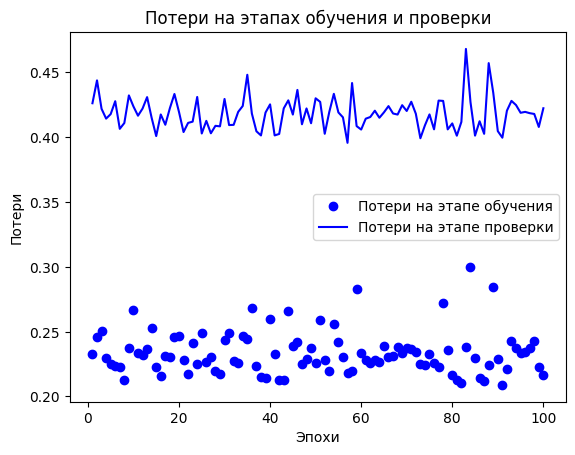

In [125]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

In [126]:
test_loss, test_acc = model.evaluate(test_dataset_tf, test_labels_tf)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8693
Test accuracy: 0.869


In [127]:
model.save("model/modelColor.keras")